In [202]:
import pandas as pd
from pandas import Series, DataFrame

#removes all paranthesis and commas from the data, convert to float values
#assumes that a an opening paranthesis indicates a negative number
def make_float(x):
    if type(x) is float: #ignore exsiting 'nan'/float values
        return
    if "-" in x: #dash means there is no data for that year
        return float('nan')
    return float(x.replace("(", "-").replace(",","").replace(")",""))

city_budget = pd.read_csv('city_budget_data.csv')

city_budget["2015"] = city_budget["2015"].apply(make_float)
city_budget["2016"] = city_budget["2016"].apply(make_float)
city_budget["2017"] = city_budget["2017"].apply(make_float)
city_budget["2018"] = city_budget["2018"].apply(make_float)


fire_budget = city_budget[city_budget["Agency"] == "30 -  FIRE"]
fire_budget.reset_index(drop=True)

revenue_by_account_type = fire_budget[fire_budget["Account Type"] == "Revenue"].groupby(['Object']).sum()
expense_by_account_type = fire_budget[fire_budget["Account Type"] == "Expense"].groupby(['Object']).sum()

print("Revenue: " + str(revenue_by_account_type["2018"].sum()))
print("Expenses: " + str(expense_by_account_type["2018"].sum()))

print("Total: " + str(revenue_by_account_type["2018"].sum() + expense_by_account_type["2018"].sum()))

pd.options.display.max_rows = 100
#fire_budget


Revenue: -1690023.0
Expenses: 55214906.0
Total: 53524883.0


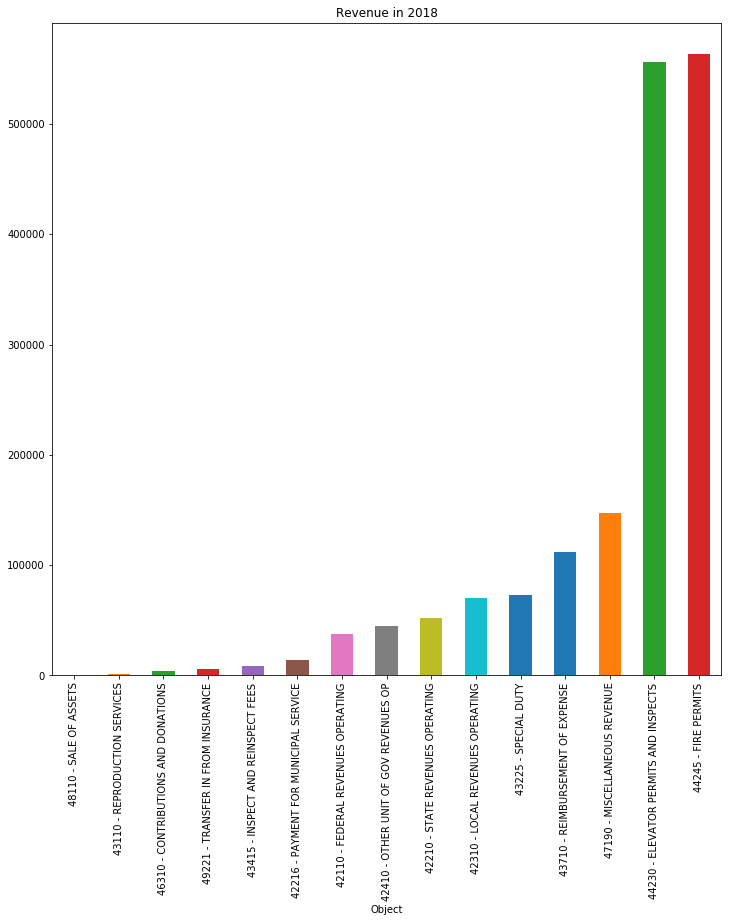

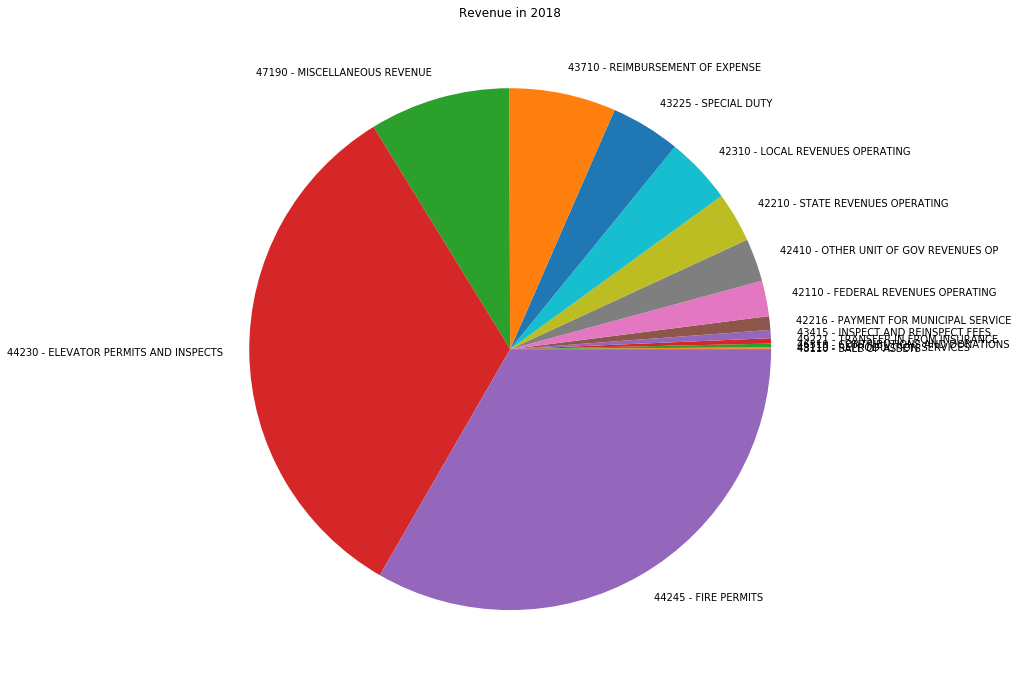

In [203]:
%matplotlib inline

revenue_by_account_type.sort_values(by = ["2018"], ascending=False, inplace = True)


#create two plots, a bar graph and a pie chart of the revenue sources for 2018. 
#TODO: Why is all revenue negative?
(revenue_by_account_type*-1).plot.bar(y = "2018", figsize = (12,12), legend = False, title = "Revenue in 2018")
(revenue_by_account_type*-1).plot.pie(y = "2018", legend = False, figsize=(12,12), label = "", title = "Revenue in 2018")




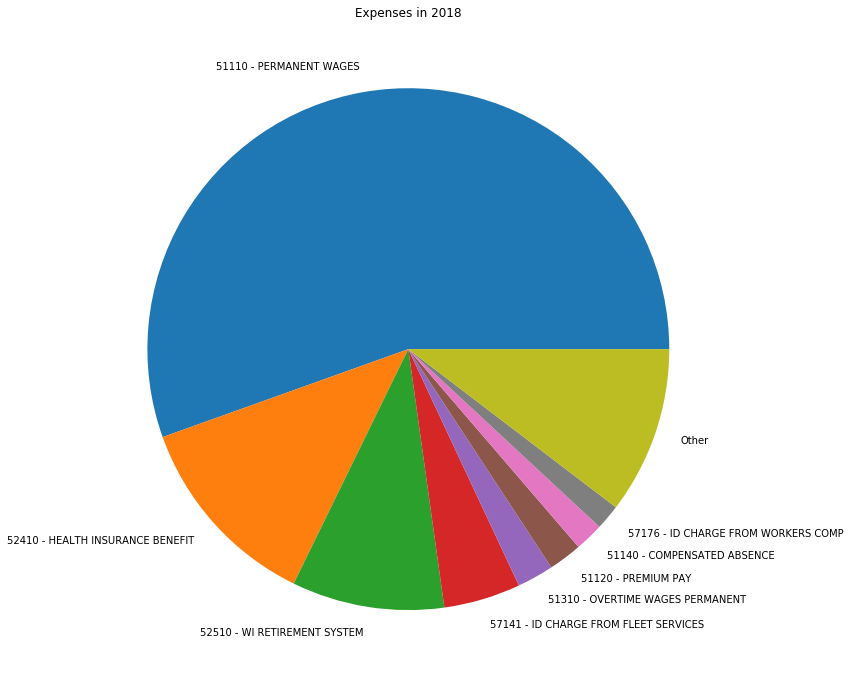

In [204]:
expense_by_account_type.sort_values(by = ["2018"], ascending=False, inplace = True)

other_expenses = Series([sum(expense_by_account_type["2018"]) - sum(expense_by_account_type["2018"].head(8))],index = ["Other"])
plotable_expenses = pd.concat([expense_by_account_type["2018"].head(8),other_expenses])

plotable_expenses.plot.pie(y = "2018", figsize = (12,12), legend = False, title = "Expenses in 2018", label = "")




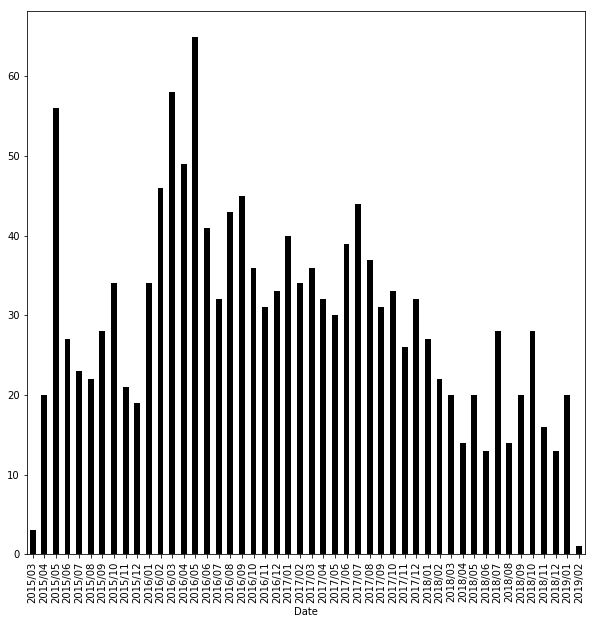

In [205]:
def drop_day(x):
    return str(x)[-4:]+"/"+str(x)[:2]



daily_reports = pd.read_csv('FireDailyReports/fire_data.csv')
daily_reports = daily_reports.dropna(subset=["Date"])
daily_reports = daily_reports.reset_index()
monthly_summary = daily_reports
monthly_summary["Date"] = daily_reports["Date"].apply(drop_day)

monthly_summary.groupby("Date").count()["index"].plot.bar(color=(0,0,0,1), figsize = (10,10))


In [213]:
top_categories = monthly_summary.groupby("Incident Type").count().sort_values(["index"],ascending=False).head(10).index

def simple_type(x):
    if top_categories.contains(x):
        return x;
    else:
        return "Other"
    

condensed_monthly_categories = monthly_summary
condensed_monthly_categories["Incident Type"] = monthly_summary["Incident Type"].apply(simple_type)

daily_reports


,index,Incident,Date,Incident Type,Address,Updated
0,0,Fire Displaces Several Occupants From Complex ...,2019/02,Structure,"2100 Block Luann Lane, Madison, WI",NaN
1,1,Vehicle A Total Loss After Charcoal Placed Und...,2019/01,Vehicle,"3700 Block Karstens Drive, Madison, WI",NaN
2,2,Three Become Ill From Carbon Monoxide Leak,2019/01,Carbon Monoxide,"2100 Block University Avenue, Madison, WI",NaN
3,3,Attempt To Thaw Pipes Leads To Fire Inside Bas...,2019/01,Structure,"4100 Block Mineral Point Road, Madison, WI",NaN
4,4,Automatic Fire Sprinkler Keeps Fire Contained ...,2019/01,Structure,"6700 Block Mader Drive, Madison, WI",NaN
5,5,Fire Crews Battle House Fire In Bitter Cold Te...,2019/01,Structure,"4800 Block Buckeye Rd, Madison, WI 53716",Updated: 01/31/2019
6,6,Smoldering Booklet Left On Top Of Furnace Trig...,2019/01,Structure,"300 Block S. Park Street, Madison, WI",NaN
7,7,Pipes Burst Inside Vacant Building On Internat...,2019/01,Other,"2900 Block International Lane, Madison, WI",NaN
8,8,Nineteen Residents Displaced By Morning Fire,2019/01,Structure,"4700 Block Cottage Grove Rd, Madison, WI 53716",Updated: 01/28/2019
9,9,Nobody Injured After Snow Is Tossed On Pan Of ...,2019/01,Cooking,"700 Block N. Thompson Drive, Madison, WI",NaN


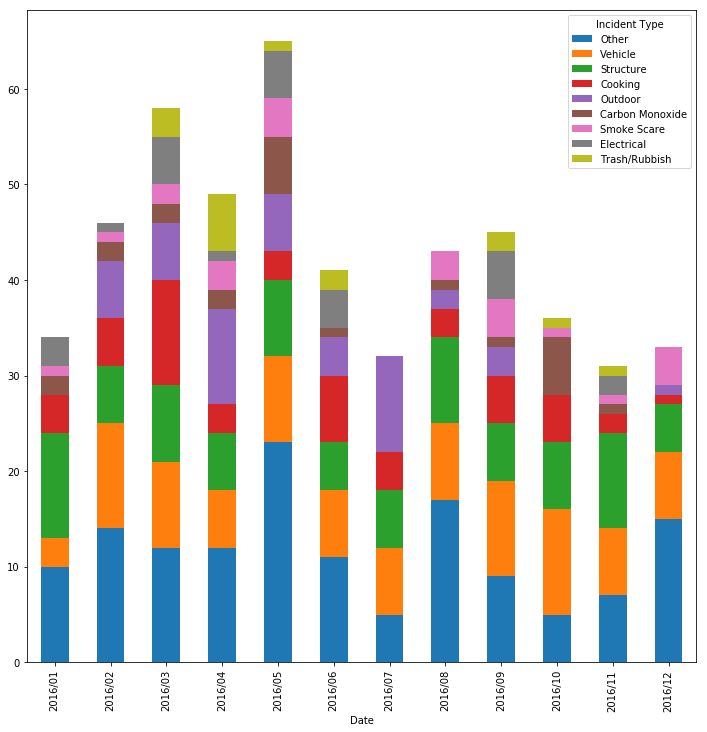

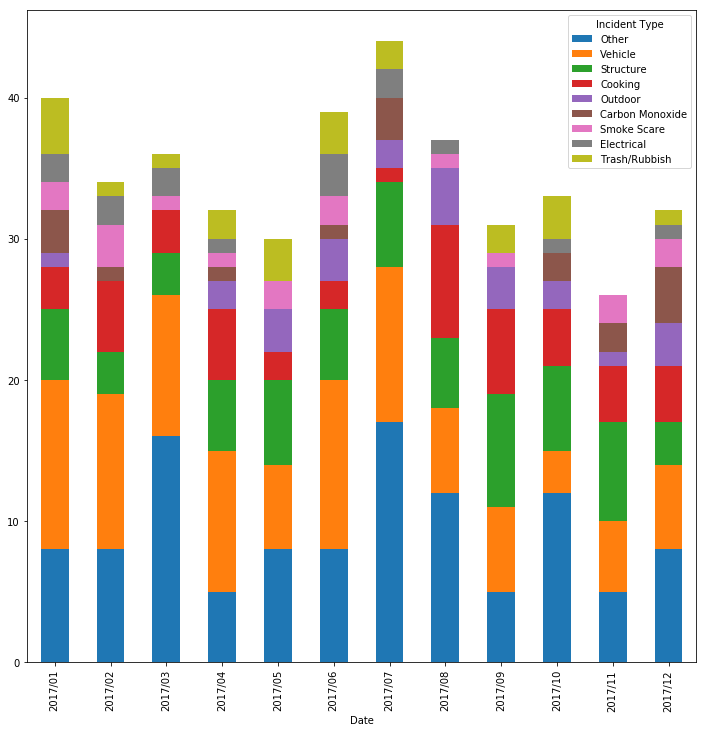

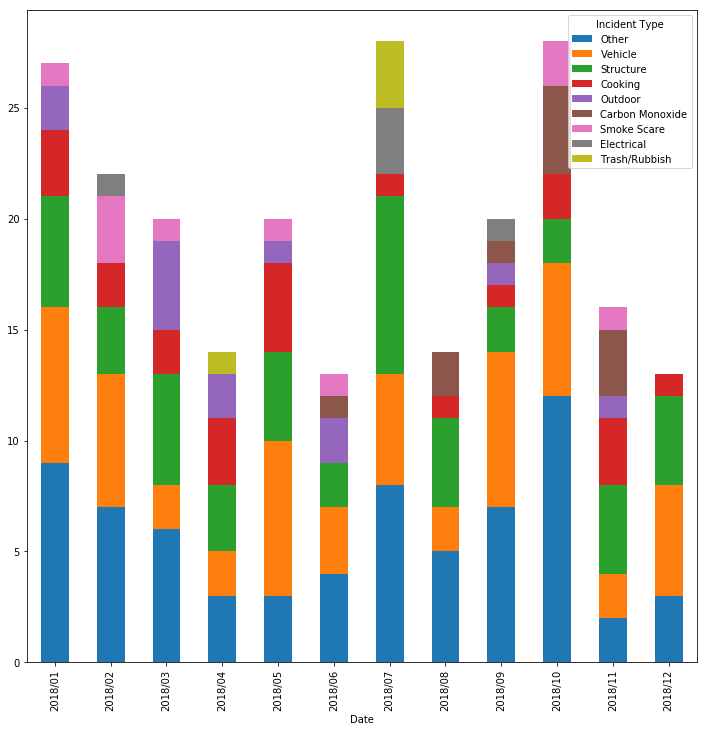

In [214]:

broken_summary = condensed_monthly_categories.groupby(['Date', 'Incident Type'])['Date'].count().unstack('Incident Type').fillna(0)
broken_bar = broken_summary[condensed_monthly_categories.groupby(["Incident Type"]).count().index.values]
#broken_bar.plot(kind='bar', stacked=True, legend = False, figsize = (12,12))

list = top_categories.tolist()
list.remove("Other")
list.insert(0,"Other")

broken_bar = broken_bar[list]

#Yearly Summaries
dates_2016 = [index for index in broken_bar.index if index.startswith('2016')]
broken_bar.loc[dates_2016].plot(kind='bar', stacked=True, figsize = (12,12))

dates_2017 = [index for index in broken_bar.index if index.startswith('2017')]
broken_bar.loc[dates_2017].plot(kind='bar', stacked=True, figsize = (12,12))

dates_2018 = [index for index in broken_bar.index if index.startswith('2018')]
broken_bar.loc[dates_2018].plot(kind='bar', stacked=True, figsize = (12,12))